pendiente colocar la version al archivo

In [1]:
#* Elaborate by lmlimasd
#* Version 0.4
#* Date: 2022-06-14
#* function for Notebook Jupyter and Notebook Jupyter extension of Visual Study Code 
#* see the requirements.txt for more details about the libreries version

import pandas as pd
import numpy as np
#* Plot figures
import seaborn as sns
from matplotlib.widgets import Slider, Button, RadioButtons
import matplotlib.pyplot as plt


In [6]:
df = pd.DataFrame()
df = pd.read_csv(r'dataset.csv',sep = ';', encoding='utf-8', error_bad_lines=False, warn_bad_lines=False)
df.head(3)

,Unnamed: 0,Document Title,Authors,Author Affiliations,Publication Title,Date Added To Xplore,Publication Year,Volume,Issue,Start Page,...,Article Citation Count,Patent Citation Count,Reference Count,License,Online Date,Issue Date,Meeting Date,Publisher,Document Identifier,type_art
0,0,Design of a 3D convolutional neural network mo...,A. Casallas; C. Ferro; N. Celis; C. Mogollon-S...,"Sergio Arboleda University,School of Exact Sci...",2021 Congreso Colombiano y Conferencia Interna...,10 Feb 2022,2021,NaN,NaN,1,...,NaN,NaN,12.0,IEEE,10 Feb 2022,NaN,NaN,IEEE,IEEE Conferences,Journals
1,1,Bibliometric and impact analysis of the Projec...,C. Rincón-González; F. N. Díaz-Piraquive; M. D...,"Faculty of Engeeniering, Universidad EAN.,Bogo...",2019 Congreso Internacional de Innovación y Te...,16 Jan 2020,2019,NaN,NaN,1,...,1.0,NaN,35.0,NaN,16 Jan 2020,NaN,NaN,IEEE,IEEE Conferences,Journals
2,2,Nonfatal lightning injuries in Colombia: Case ...,J. A. Cristancho C.; C. Rivera; J. J. Pantoja;...,Electromagnetic Compatibility Research Group E...,2015 International Symposium on Lightning Prot...,30 Nov 2015,2015,NaN,NaN,157,...,3.0,NaN,10.0,NaN,30 Nov 2015,NaN,NaN,IEEE,IEEE Conferences,Journals


In [7]:
# A review of the content of the dataset by column
column_of_interest =[
    # 'ID',
    # 'type_art'  
    'Document Title',
    'Authors', #autor del documento
    'Author Affiliations', #identificación del Authors
    'Publication Title', #título del documento
    # 'Date Added To Xplore',
    'Publication Year', #año de publicación
    # 'Volume',
    'Issue', #código que clasifica según el origen del autor del articulo (academico, industria, politico, etc)
    # 'Start Page',
    # 'End Page',
    # 'Abstract',
    # 'ISSN',
    # 'ISBNs',
    # 'DOI',
    # 'Funding Information',
    # 'PDF Link',
    'Author Keywords', #palabras clave
    'IEEE Terms', #palabras clave segun IEEE
    'INSPEC Controlled Terms', #palabras clave segun ispec con control
    'INSPEC Non-Controlled Terms', #palabras clave segun ispec sin control
    # 'Mesh_Terms',
    'Article Citation Count', #cuenta de las citaciones al artículo
    'Patent Citation Count', #cuenta a las patentes del artículo
    'Reference Count', #número de veces que el artículo es citado
    # 'License',
    # 'Online Date',
    # 'Issue Date',
    # 'Meeting Date',
    # 'Publisher',
    'Document Identifier'
]

In [8]:
import function_plot_distribution_columns as fp 

In [12]:
#convert the number of numbert o string
df['Publication Year'] = df['Publication Year'].astype(str)

,Publication Year,Count,(%) of total data
2,2015,396,14.23
5,2016,339,12.19
4,2017,340,12.22
3,2018,365,13.12
0,2019,538,19.34
6,2020,335,12.04
1,2021,398,14.31


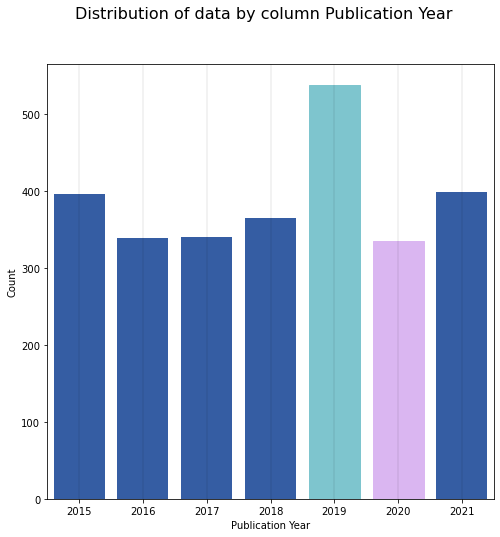

In [13]:
#analysis number of articules between 2015-2021
#dont plot the year 20222 and sort by uniquva values name
#indicate the max and min value
fp.plot_distribution_clm(df,'Publication Year', order_A_Z  = True, notplot = ['2022'], dif_colors = True)

,type_art,Count,(%) of total data
1,Conferences,782,28.11
0,Journals,2000,71.89


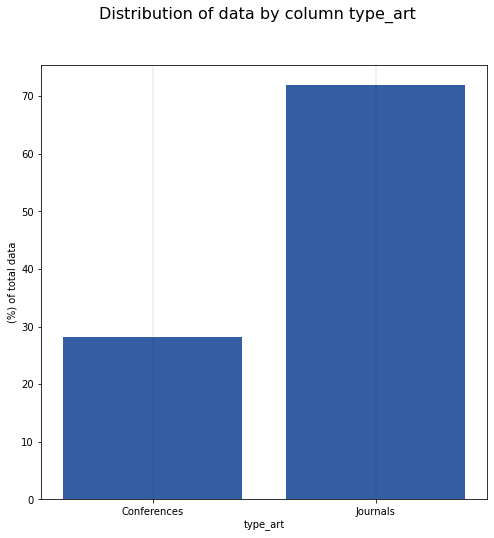

In [16]:
#distribution of articules by type. The distribution is normalized
fp.plot_distribution_clm(df,'type_art', order_A_Z  = True, notplot = ['2022'], porcentage = True)

,Author Keywords,Count,(%) of total data
0,MACHINE LEARNING,66,0.54
1,OPTIMIZATION,42,0.35
2,POWER QUALITY,35,0.29
3,MICROGRIDS,28,0.23
4,INTERNET OF THINGS,28,0.23
5,DEEP LEARNING,28,0.23
6,SIMULATION,28,0.23
7,DISTRIBUTED GENERATION,27,0.22
8,AIR QUALITY,25,0.21
9,MICROGRID,22,0.18


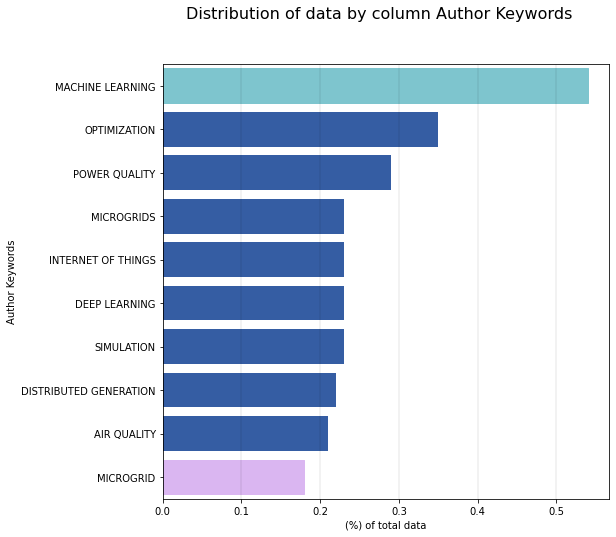

In [20]:
#analysis by key words of the articule
name_column = 'Author Keywords'
tmp_dataframe = pd.DataFrame()
tmp_dataframe= df[name_column].str.split(';').dropna([])
list_words=list()
for id,list_kwords in tmp_dataframe.items(): #
    for elem in list_kwords:
        list_words.append(elem.upper())
tmp_dataframe = pd.DataFrame()
tmp_dataframe = pd.DataFrame(list_words,columns =[name_column])


fp.plot_distribution_clm(tmp_dataframe,name_column, dif_colors = True, point = 10, porcentage = True, pst ='h')

,IEEE Terms,Count,(%) of total data
0,MATHEMATICAL MODEL,355,2.08
1,SOFTWARE,221,1.29
2,MONITORING,176,1.03
3,COMPUTATIONAL MODELING,159,0.93
4,TOOLS,153,0.90
5,OPTIMIZATION,134,0.78
6,URBAN AREAS,108,0.63
7,VISUALIZATION,107,0.63
8,SILICON COMPOUNDS,103,0.60
9,ANALYTICAL MODELS,95,0.56


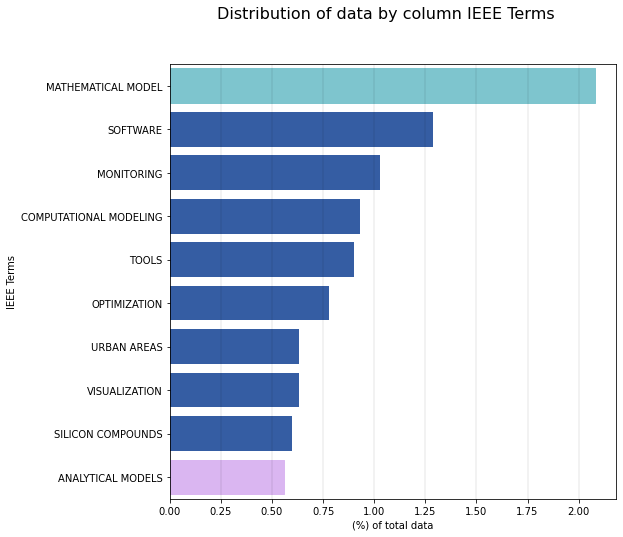

In [22]:
#analysis by IEEE Terms of the articule
name_column = 'IEEE Terms'
tmp_dataframe = pd.DataFrame()
tmp_dataframe= df[name_column].str.split(';').dropna([])
list_words=list()
for id,list_kwords in tmp_dataframe.items(): #
    for elem in list_kwords:
        list_words.append(elem.upper())
tmp_dataframe = pd.DataFrame()
tmp_dataframe = pd.DataFrame(list_words,columns =[name_column])
fp.plot_distribution_clm(tmp_dataframe,name_column, dif_colors = True, point = 10, porcentage = True, pst ='h')

,Author Affiliations,Count,(%) of total data
3,UNIVERSIDAD NACIONAL DE COLOMBIA,1236,2.80
5,UNIVERSIDAD DE LOS ANDES,526,1.19
7,UNIVERSIDAD INDUSTRIAL DE SANTANDER,396,0.90
15,PONTIFICIA UNIVERSIDAD JAVERIANA,239,0.54
17,UNIVERSIDAD CATOLICA DE COLOMBIA,206,0.47


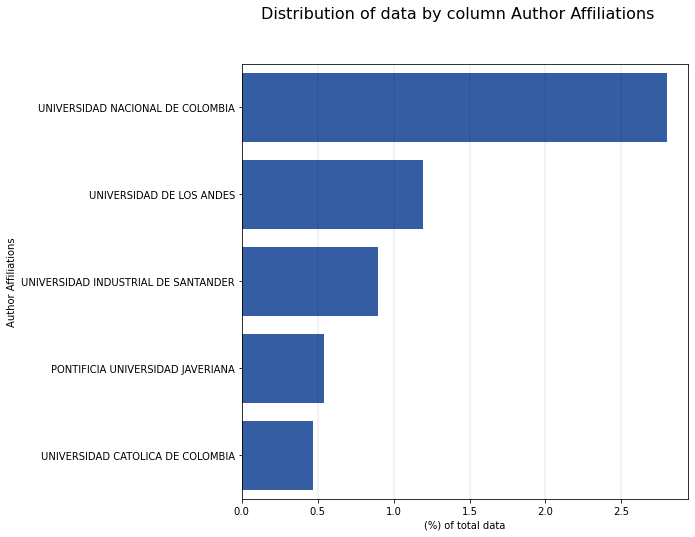

In [26]:
##analysis for University
#funtion for cleaning the strings
import re
def replace_letter_2(clm_name):  #change someone characters
    dict_remove_char ={
         "\t": ""
        ,"\n": ""
        ,'á':"a"
        ,'é':"e"
        ,'í':"i"
        ,'ó':"o"
        ,'ú':"u"
        ,'ñ':'n'
        ,';':','
        ,'x00e1':'a'
        ,'d.c.':''
        ,'university':'universidad'
    }
    clm_name = clm_name.lower().strip()#rstrip().lstrip()
    for spcchar in dict_remove_char.keys():
        clm_name = clm_name.replace(str(spcchar), str(dict_remove_char[spcchar]))
    return clm_name.upper()


name_column = 'Author Affiliations'
tmp_dataframe = pd.DataFrame()
tmp_dataframe= df[name_column].apply(replace_letter_2) #.str.split(',').dropna([])
tmp_dataframe = tmp_dataframe.str.split(',').dropna([])

list_words=list()
for id,list_kwords in tmp_dataframe.items(): #
    for elem in list_kwords:
        list_words.append(re.sub(r'[\W_]+', ' ', str(elem)).strip().upper())



tmp_dataframe = pd.DataFrame()
tmp_dataframe = pd.DataFrame(list_words,columns =[name_column])
list_drop = [
''
,'COLOMBIA'
,'BOGOTA'
,'MEDELLIN'
,'BUCARAMANGA'
,'CALI'
,'SPAIN'
,'USA'
,'MANIZALES'
,'BARRANQUILLA'
,'FACULTY OF ENGINEERING'
,'FACULTAD DE INGENIERIA'
,'POPAYAN'
]

fp.plot_distribution_clm(tmp_dataframe,name_column, order_A_Z  = False, dif_colors = False,notplot =list_drop, point = 5, porcentage = True, pst ='h')

,Author Affiliations,Count,(%) of total data
1,BOGOTA,2903,6.59
2,MEDELLIN,1326,3.01
4,BUCARAMANGA,591,1.34
6,CALI,525,1.19
12,MANIZALES,269,0.61


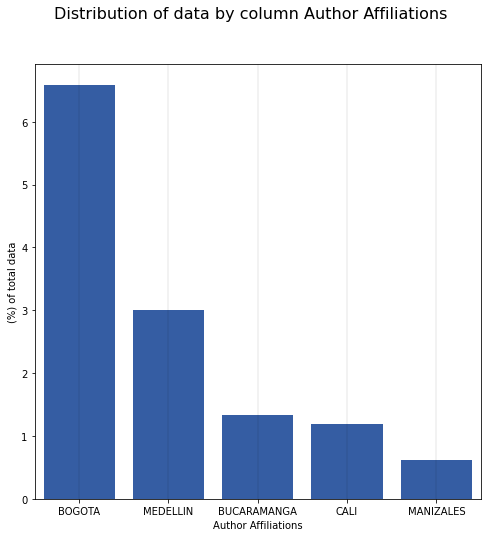

In [28]:
##analysis for City
list_drop = [
''
,'COLOMBIA'
,'UNIVERSIDAD NACIONAL DE COLOMBIA'
,'UNIVERSIDAD DE LOS ANDES'
,'UNIVERSIDAD INDUSTRIAL DE SANTANDER'
,'FACULTAD DE INGENIERIA'
,'SPAIN'
,'USA'
]

fp.plot_distribution_clm(tmp_dataframe,name_column, order_A_Z  = False, dif_colors = False,notplot =list_drop, point = 5, porcentage = True, pst ='v')